In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\bhara\Downloads\diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [4]:
#ROws and columns in dataset
df.shape

(15000, 3)

In [5]:
#Basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [6]:
#Missing values
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [7]:
#Duplicated value
df.duplicated().sum()

0

#Feature engineering on feature  'order_placed_at', 'order_delivered_at'


In [8]:
df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])

In [9]:
df['time_taken_for_delivery'] = df['order_delivered_at'] - df['order_placed_at']
df['time_taken_for_delivery'] = df['time_taken_for_delivery']/np.timedelta64(1,'m')

In [10]:
df.dtypes

order_id                            int64
order_placed_at            datetime64[ns]
order_delivered_at         datetime64[ns]
time_taken_for_delivery           float64
dtype: object

In [11]:
df['order_placed_date']=df['order_placed_at'].dt.date

In [12]:
df['order_placed_time']=df['order_placed_at'].dt.time

In [13]:
df['order_delivered_date']=df['order_delivered_at'].dt.date

In [14]:
df['order_delivered_time']=df['order_delivered_at'].dt.time

In [15]:
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056


Creating New Feature called time_period which will help to traffic of deliveries during differeent period of day

In [16]:
#time_period feature
df['time_period'] = df['order_placed_at'].apply(lambda x: "late night" if x.hour > 1 and x.hour <= 4 else ("Morning" if x.hour > 4 and x.hour <= 12 else ("Afternoon" if x.hour > 12 and x.hour <= 16 else ("Evening" if x.hour > 16 and x.hour <=19 else "night"))))

In [17]:
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,night
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,night
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,night
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,night
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,night


In [18]:
#countplot for time_period feature
df['time_period'].value_counts()

Morning       5002
night         3785
Afternoon     2452
Evening       1889
late night    1872
Name: time_period, dtype: int64

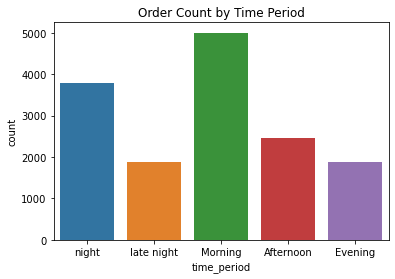

In [20]:
# Visualize time periods during which most orders are placed
sns.countplot(x='time_period', data=df)
plt.title('Order Count by Time Period')
plt.show()

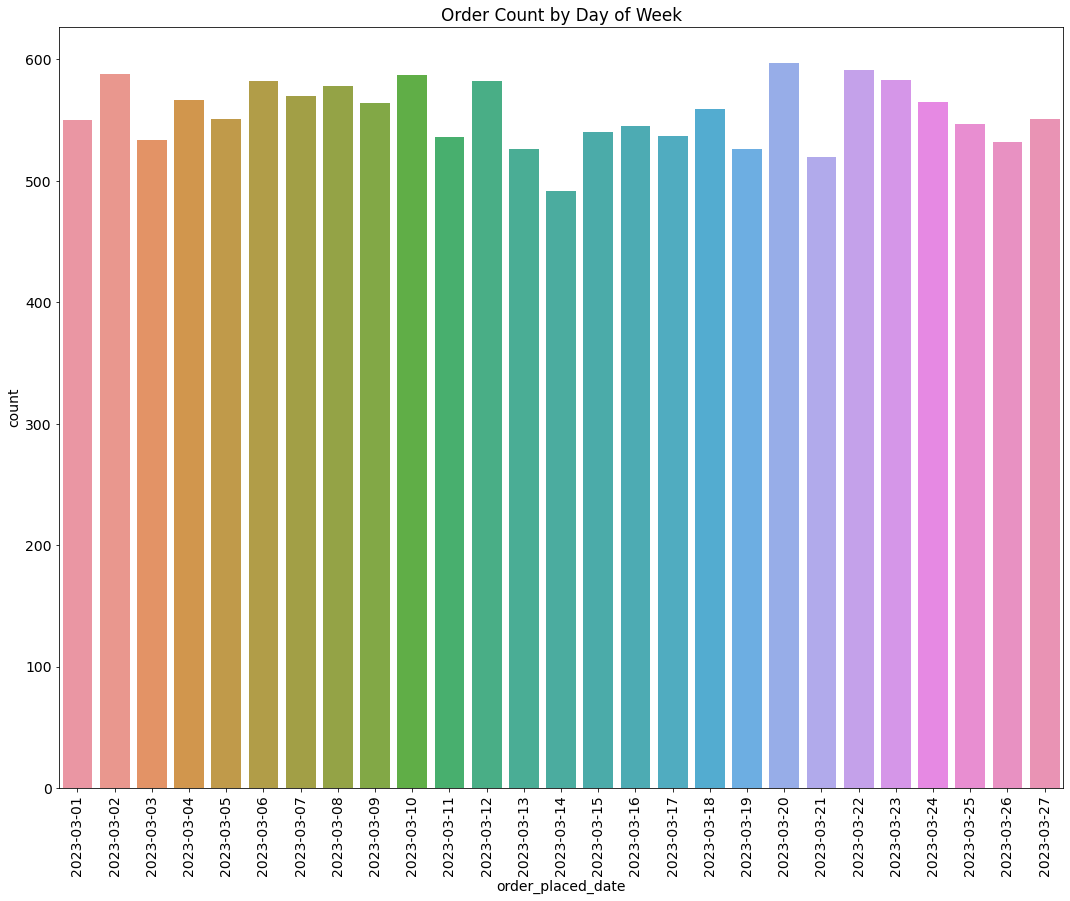

In [25]:
# Set the figure size and font size
plt.rcParams["figure.figsize"] = [18, 14]
plt.rcParams.update({'font.size': 14})
# Visualize days of the week during which most orders are placed
sns.countplot(x='order_placed_date', data=df)
plt.title('Order Count by Day of Week')
# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()

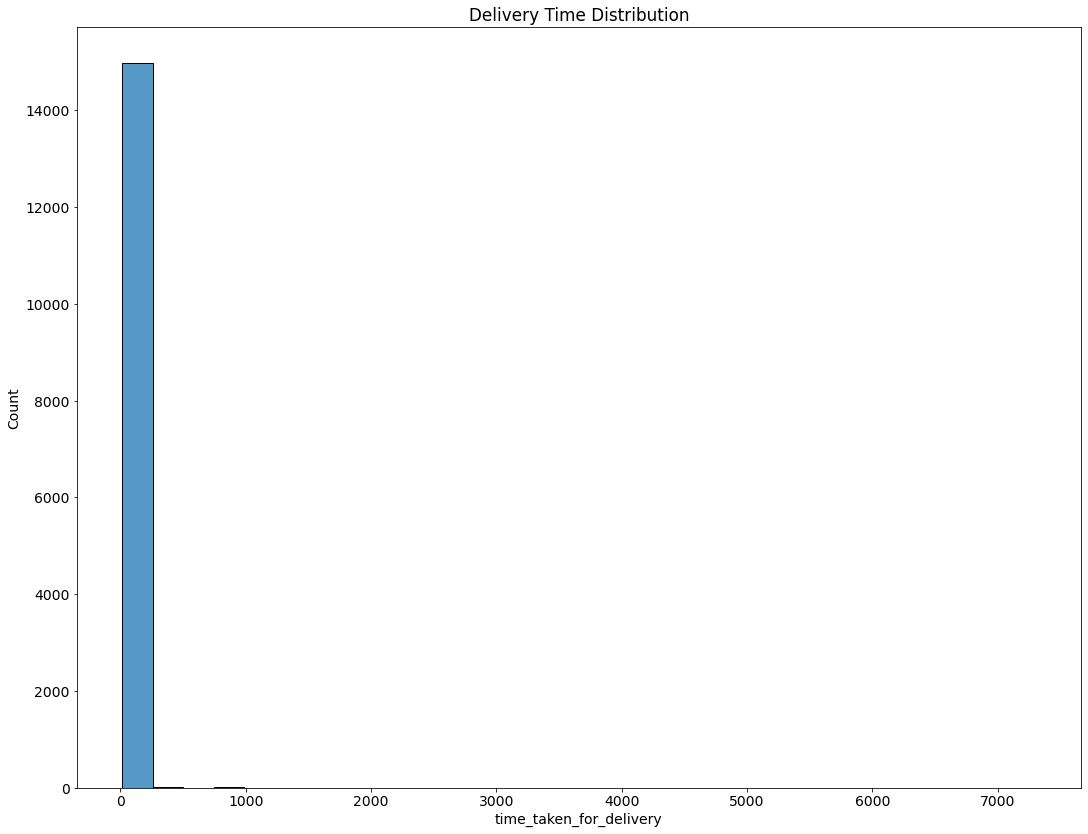

In [27]:
# Visualize delivery times
sns.histplot(x='time_taken_for_delivery', data=df, bins=30)
plt.title('Delivery Time Distribution')
plt.show()

<AxesSubplot:xlabel='time_period', ylabel='Count'>

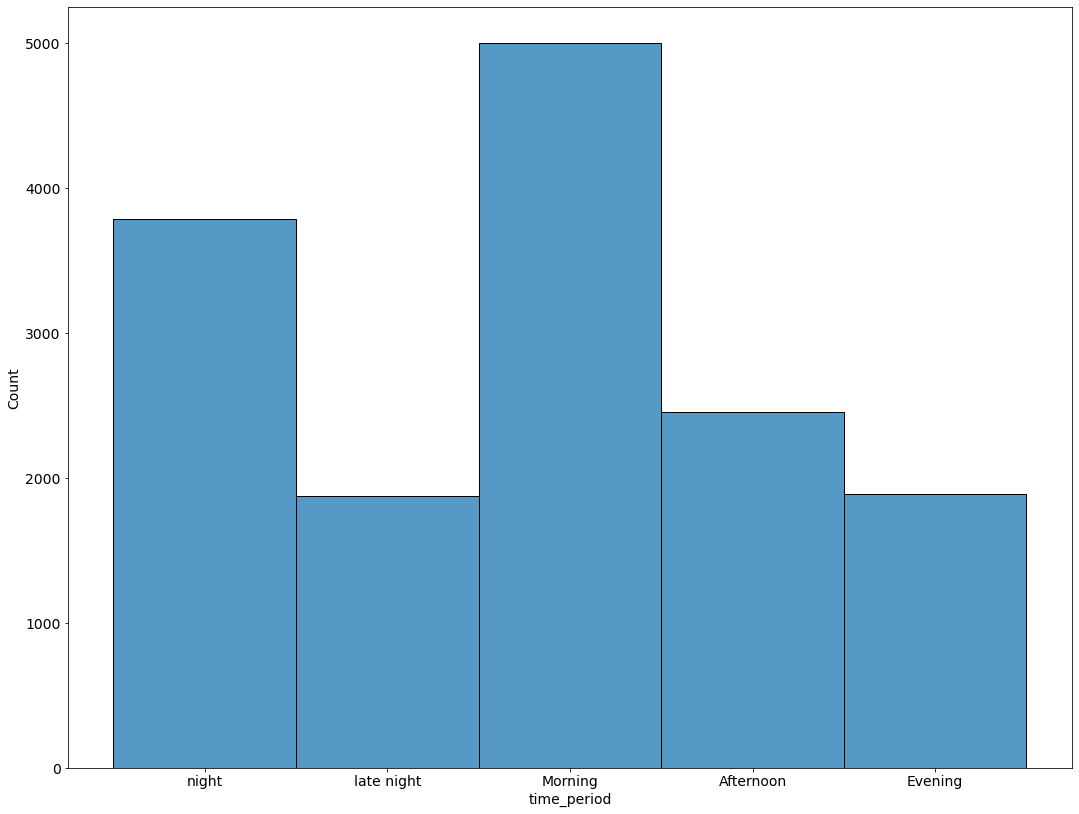

In [29]:
sns.histplot(df['time_period'])

# Insights
* during 4am to 12pm (morning) around 5002 orders are placed
* follwed by 3785 at night and 2452 at afternoon

 ### **conclusion** 
 We can put more delivery boys for morning and afternoon shift

Dropping feature order_placed_at and order_delivered_at

In [30]:
df.drop(['order_placed_at', 'order_delivered_at'], axis=1, inplace=True)

In [31]:
df.head()

,order_id,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period
0,1523111,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,night
1,1523112,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,night
2,1523113,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,night
3,1523114,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,night
4,1523115,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,night


In [32]:
df.dtypes

order_id                     int64
time_taken_for_delivery    float64
order_placed_date           object
order_placed_time           object
order_delivered_date        object
order_delivered_time        object
time_period                 object
dtype: object

In [33]:
df['order_placed_day'] =  pd.to_datetime(df['order_placed_date']).dt.day_name()

In [34]:
df['order_delivered_day'] =  pd.to_datetime(df['order_delivered_date']).dt.day_name()

In [35]:
df.head()

,order_id,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period,order_placed_day,order_delivered_day
0,1523111,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,night,Wednesday,Wednesday
1,1523112,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,night,Wednesday,Wednesday
2,1523113,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,night,Wednesday,Wednesday
3,1523114,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,night,Wednesday,Wednesday
4,1523115,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,night,Wednesday,Wednesday


## Report 

Anyways delivery time will never be more than 2hr

but if customer placed order at 23.50 delivary will be reached on next day that's why we created order_delivered_day feature else order_placed_day feature is enough

## **Countplot for order_placed_day**


In [36]:
df['order_placed_day'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: order_placed_day, dtype: int64

<AxesSubplot:xlabel='order_placed_day', ylabel='Count'>

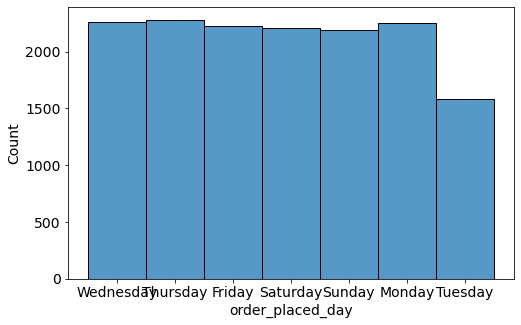

In [37]:
#countplot for feature order_placed_day
plt.figure(figsize=(8,5))
sns.histplot(df['order_placed_day'])

## **Report**

Except **Tuesday** all others day has appox equal number of ordered placed


On Tuesday we can give some discount to customers so we can increase ordered on that day to

In [38]:
df.head(1)

,order_id,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period,order_placed_day,order_delivered_day
0,1523111,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,night,Wednesday,Wednesday


In [39]:
df.dtypes

order_id                     int64
time_taken_for_delivery    float64
order_placed_date           object
order_placed_time           object
order_delivered_date        object
order_delivered_time        object
time_period                 object
order_placed_day            object
order_delivered_day         object
dtype: object

In [40]:
#analysing feature time_taken_for_delivery
df['time_taken_for_delivery'].min()

15.000010333333334

In [41]:
df['time_taken_for_delivery'].mean()

20.499389326467746

In [42]:
df['time_taken_for_delivery'].median()

15.797986066666667

In [43]:
df['time_taken_for_delivery'].max()

7299.831374933333

In [44]:
df['time_taken_for_delivery'].quantile(0.95)

27.261043996666658

In [45]:
count=0
for i in df['time_taken_for_delivery']:
  if i > 30.00:
    count=count+1
print(f"Out of 15k deliveries {count} deliveries are late")
    

Out of 15k deliveries 604 deliveries are late


In [46]:
df.shape

(15000, 9)

In [47]:
(604/df.shape[0])*100

4.026666666666666

In [48]:
pd.set_option("display.max.rows", None)
df[df['time_taken_for_delivery']>1440]


,order_id,time_taken_for_delivery,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period,order_placed_day,order_delivered_day
4165,1527276,5867.434753,2023-03-08,09:46:43,2023-03-12,11:34:09.085175,Morning,Wednesday,Sunday
5499,1528610,7299.831375,2023-03-10,17:06:22,2023-03-15,18:46:11.882496,Evening,Friday,Wednesday
10007,1533118,2883.124250,2023-03-19,00:56:34,2023-03-21,00:59:41.454974,night,Sunday,Tuesday
10225,1533336,4485.891210,2023-03-19,11:07:32,2023-03-22,13:53:25.472592,Morning,Sunday,Wednesday
14155,1537266,3888.444088,2023-03-26,09:54:24,2023-03-29,02:42:50.645252,Morning,Sunday,Wednesday


Final report:


1.The average orders = 555 

2.maximum orders = 597 is on 20 march 

3.minimum orders = 492 is on 14 march

4.average delivery time is more on sunday i.e 23.9 minutes

5.minimum orders on Tuesday

Conclusion:

* We can put more delivery boys in morning and afternoon as the number of orders are more
* We can give some discounts on Tuesday to increase the number of order



